In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [60]:
df=pd.read_csv('covid.csv')

In [61]:
print(df)

            Country/Region      Continent    Population  TotalCases  NewCases  \
0                      USA  North America  3.311981e+08     5032179       NaN   
1                   Brazil  South America  2.127107e+08     2917562       NaN   
2                    India           Asia  1.381345e+09     2025409       NaN   
3                   Russia         Europe  1.459409e+08      871894       NaN   
4             South Africa         Africa  5.938157e+07      538184       NaN   
..                     ...            ...           ...         ...       ...   
204             Montserrat  North America  4.992000e+03          13       NaN   
205  Caribbean Netherlands  North America  2.624700e+04          13       NaN   
206       Falkland Islands  South America  3.489000e+03          13       NaN   
207           Vatican City         Europe  8.010000e+02          12       NaN   
208         Western Sahara         Africa  5.986820e+05          10       NaN   

     TotalDeaths  NewDeaths

In [62]:
df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [63]:
df.tail()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
204,Montserrat,North America,4992.0,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,26247.0,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3489.0,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,801.0,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe
208,Western Sahara,Africa,598682.0,10,NaN,1.0,NaN,8.0,NaN,1.0,NaN,17.0,2.0,NaN,NaN,Africa


In [64]:
df.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


In [65]:
df.shape

(209, 16)

In [66]:
df.isnull()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
1,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
2,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
3,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
4,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,False,False,False,False,True,False,True,False,True,False,True,False,False,False,False,True
205,False,False,False,False,True,True,True,False,True,False,True,False,True,False,False,True
206,False,False,False,False,True,True,True,False,True,False,True,False,True,False,False,True
207,False,False,False,False,True,True,True,False,True,False,True,False,True,True,True,False


In [67]:
df.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [68]:
df.fillna(0, inplace=True)

In [69]:
df['Country/Region'] = df['Country/Region'].astype(str)
df['Continent'] = df['Continent'].astype(str)
df['WHO Region'] = df['WHO Region'].astype(str)

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Country/Region'] = le.fit_transform(df['Country/Region'])
df['Continent'] = le.fit_transform(df['Continent'])
df['WHO Region'] = le.fit_transform(df['WHO Region'])

In [71]:
df['TotalCases_per_Million'] = df['TotalCases'] / df['Population'] * 1_000_000
df['Deaths_per_Million'] = df['TotalDeaths'] / df['Population'] * 1_000_000
df['Tests_per_Million'] = df['TotalTests'] / df['Population'] * 1_000_000

In [72]:
X = df[['Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 
        'NewRecovered', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 
        'Tests/1M pop', 'Continent', 'WHO Region', 'TotalCases_per_Million', 'Deaths_per_Million']]

In [73]:
y = df['ActiveCases']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [76]:
df.dropna(inplace=True)

In [77]:
df.fillna(df.mean(), inplace=True)

In [78]:
 import numpy as np

# Replace Inf or -Inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN values
df.dropna(inplace=True)



In [79]:
# Fill NaN values with the mean of the respective column
df.fillna(df.mean(), inplace=True)


In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [81]:
# Assuming X_train and X_test are your feature datasets
X_train = scaler.fit_transform(X_train)

In [82]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [84]:
if X_test.isnull().values.any() or np.any(np.isinf(X_test)):
    print("There are still NaN or infinite values in the dataset!")
else:
    print("No NaN or infinite values.")

There are still NaN or infinite values in the dataset!


In [94]:
# Assuming you have already trained the model and have X_test
from sklearn.metrics import mean_absolute_error


In [101]:
X_train = np.where(np.isinf(X_train), np.nan, X_train)
X_test = np.where(np.isinf(X_test), np.nan, X_test)


In [102]:
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train, axis=0))
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test, axis=0))

In [103]:
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train, axis=0))
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test, axis=0))

In [104]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train) 

RandomForestRegressor()

In [106]:
y_pred = model.predict(X_test)

In [108]:
y_pred = model.predict(X_test)

In [109]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 1579412.68


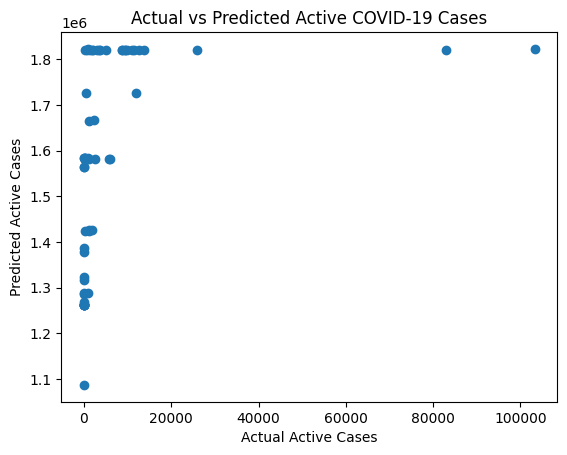

In [110]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Active Cases')
plt.ylabel('Predicted Active Cases')
plt.title('Actual vs Predicted Active COVID-19 Cases')
plt.show()